In [138]:
import csv
import numpy as np
import pandas as pd
from scipy import interpolate
article_open= open('/home/sharvari_ubuntu/Documents/DM/DM_project/codename-caeli-main/Cleaned Datasets/AirQualityData-Clean.csv')
csv_read = csv.reader(article_open)
list_csv=list(csv_read)
# print(list_csv)

In [139]:
dict_data={}
list_state=[]
for i in range(1,len(list_csv)):
    dict_data[list_csv[i][0]+'/'+list_csv[i][1]]=list_csv[i][2:]
    list_state.append(list_csv[i][0])
# print(dict_data)    

In [140]:
#for key,value in dict_data.items():
#    for v in dict_data.values():
#        if v[2]==''

for state in list(set(list_state)):
    year_so2=[]
    year_no2=[]
    year_rspm=[]
    empty_year_so2=[]
    empty_year_no2=[]
    empty_year_rspm=[]
    value_so2=[]
    value_no2=[]
    value_rspm=[]
    for i, j in dict_data.items():
        temp=i.split('/')
        if temp[0]==state:
            if j[0]!='':
                year_so2.append(int(temp[1]))
                value_so2.append(float(j[0]))
                
            else:
                empty_year_so2.append(int(temp[1]))
            
            if j[1]!='':
                year_no2.append(int(temp[1]))
                value_no2.append(float(j[1]))
            else:
                empty_year_no2.append(int(temp[1]))
            if j[2]!='':
                year_rspm.append(int(temp[1]))
                value_rspm.append(float(j[2]))
            else:
                empty_year_rspm.append(int(temp[1]))
#     print(empty_year_so2)
    for y in empty_year_so2:
#         print(y)
        stats= dict_data[state+'/'+str(y)]
        s = interpolate.interp1d(year_so2, value_so2, kind='linear',fill_value='extrapolate')
        stats[0]=str(s(y))
        dict_data[state+'/'+str(y)]=stats
        
    for y in empty_year_no2:
        print(y)
        stats= dict_data[state+'/'+str(y)]    
        n = interpolate.interp1d(year_no2, value_no2, kind='linear', fill_value = "extrapolate")
        stats[1]=str(n(y))
        dict_data[state+'/'+str(y)]=stats
        
    for y in empty_year_rspm:
        stats= dict_data[state+'/'+str(y)]
        r = interpolate.interp1d(year_rspm, value_rspm, kind='linear', fill_value = "extrapolate")
        stats[2]=str(r(y))
        dict_data[state+'/'+str(y)]=stats
        
print(dict_data)       

            
    

2005
{'Andhra Pradesh/2005': ['6.105912596401028', '30.127730061349727', '79.3605359317905'], 'Andhra Pradesh/2006': ['7.933035714285713', '27.641621029572857', '85.93876435210498'], 'Andhra Pradesh/2007': ['6.538941118258277', '27.03730826323605', '81.51388212372139'], 'Andhra Pradesh/2008': ['6.935286103542233', '25.310249554367182', '82.35834813499112'], 'Andhra Pradesh/2009': ['7.343622200584221', '22.135101253616202', '82.74399615754082'], 'Andhra Pradesh/2010': ['5.365274725274725', '15.397188049209138', '69.48728070175439'], 'Andhra Pradesh/2011': ['4.642877492877489', '23.969164882226977', '78.89409672830725'], 'Andhra Pradesh/2012': ['7.438174273858921', '15.76285240464345', '77.66199036918138'], 'Andhra Pradesh/2013': ['7.379130434782609', '17.400198609731877', '76.64749580637431'], 'Andhra Pradesh/2014': ['8.658371040723981', '18.58235294117647', '74.89686291362268'], 'Arunachal Pradesh/2014': ['2.0', '5.0', '69.4'], 'Assam/2005': ['5.3269999999999955', '17.383050847457653',

In [141]:
state_array=['Assam','Bihar','Dadra & Nagar Haveli','Daman & Diu','Delhi','Jammu & Kashmir','Karnataka','Meghalaya','Mizoram','Nagaland','Uttarakhand']

for state in state_array:
    year=[]
    value_so2=[]
    value_no2=[]
    value_rspm=[]
    for i,j in dict_data.items():
        temp=i.split('/')
        if temp[0]==state:
            year.append(int(temp[1]))
            value_so2.append(float(j[0]))           
            value_no2.append(float(j[1]))       
            value_rspm.append(float(j[2]))
                          
    for y in range(2005,2015):
        stats=[]
        if y not in year:
            s = interpolate.interp1d(year, value_so2, kind='linear',fill_value = "extrapolate")
            n = interpolate.interp1d(year, value_no2, kind='linear',fill_value = "extrapolate")
            r = interpolate.interp1d(year, value_rspm, kind='linear',fill_value = "extrapolate")
            stats.append(str(s(y)))
            stats.append(str(n(y)))
            stats.append(str(r(y))) 
            dict_data[state+'/'+str(y)]=stats

print(dict_data)

{'Andhra Pradesh/2005': ['6.105912596401028', '30.127730061349727', '79.3605359317905'], 'Andhra Pradesh/2006': ['7.933035714285713', '27.641621029572857', '85.93876435210498'], 'Andhra Pradesh/2007': ['6.538941118258277', '27.03730826323605', '81.51388212372139'], 'Andhra Pradesh/2008': ['6.935286103542233', '25.310249554367182', '82.35834813499112'], 'Andhra Pradesh/2009': ['7.343622200584221', '22.135101253616202', '82.74399615754082'], 'Andhra Pradesh/2010': ['5.365274725274725', '15.397188049209138', '69.48728070175439'], 'Andhra Pradesh/2011': ['4.642877492877489', '23.969164882226977', '78.89409672830725'], 'Andhra Pradesh/2012': ['7.438174273858921', '15.76285240464345', '77.66199036918138'], 'Andhra Pradesh/2013': ['7.379130434782609', '17.400198609731877', '76.64749580637431'], 'Andhra Pradesh/2014': ['8.658371040723981', '18.58235294117647', '74.89686291362268'], 'Arunachal Pradesh/2014': ['2.0', '5.0', '69.4'], 'Assam/2005': ['5.3269999999999955', '17.383050847457653', '111

In [142]:
result=[]
final=dict(sorted(dict_data.items())) 
for i,j in final.items():
    temp=i.split('/')
    result.append({'State':temp[0],'Year':temp[1],'so2':j[0],'no2':j[1],'rspm':j[2]})


try:
    with open("filled_data_air_linear_final.csv", 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['State', 'Year','so2','no2','rspm'])
        writer.writeheader()
        writer.writerows(result)
except IOError:
    print("I/O error")


In [143]:
#lagranges method-bihar
x=np.array([2005,2006,2007,2008,2009,2010,2011,2012],float)
y=np.array([103.38805970149254,111.0828402366864,116.36216216216216,118.65441176470588,98.4776119402985,165.28057553956833,158.03030303030303,161.66390041493776],float)

x13=2013
x14=2014

y13=0
y14=0
# for xi,yi in zip(x,y):
#    y5+=yi*np.prod((x5-x[x != xi])/(xi-x[x != xi])) 
# # for xp in x_array:
# print(x5,y5)
# for xi,yi in zip(x,y):
#    y6+=yi*np.prod((x6-x[x != xi])/(xi-x[x != xi])) 
# print(x6,y6)

# for xi,yi in zip(x,y):
#    y12+=yi*np.prod((x12-x[x != xi])/(xi-x[x != xi])) 
# print(x12,y12)

for xi,yi in zip(x,y):
   y13+=yi*np.prod((x13-x[x != xi])/(xi-x[x != xi])) 
print(x13,y13)

for xi,yi in zip(x,y):
   y14+=yi*np.prod((x14-x[x != xi])/(xi-x[x != xi])) 
print(x14,y14)



2013 3402.523293340935
2014 22985.891013341978


In [144]:
# bihar
from scipy.interpolate import interp1d 

x = [2005,2006,2007,2008,2009,2010,2011,2012]
y = [103.38805970149254,111.0828402366864,116.36216216216216,118.65441176470588,98.4776119402985,165.28057553956833,158.03030303030303,161.66390041493776]

# xx = [1,2,3,4,5,6,7,8,9,10,11,12] 
f = interp1d(x, y, kind='cubic',fill_value='extrapolate') 


print(f(2013))
print(f(2014))

348.9949646953919
892.8370928735851


In [145]:
# bihar
from scipy.interpolate import interp1d 

x = [2005,2006,2007,2008,2009,2010,2011,2012]
y = [103.38805970149254,111.0828402366864,116.36216216216216,118.65441176470588,98.4776119402985,165.28057553956833,158.03030303030303,161.66390041493776]

# xx = [1,2,3,4,5,6,7,8,9,10,11,12] 
f = interp1d(x, y, kind='quadratic',fill_value='extrapolate') 


print(f(2013))
print(f(2014))

196.06419303837134
261.23118090060404


In [146]:
# bihar
from scipy.interpolate import interp1d 

x = [2005,2006,2007,2008,2009,2010,2011,2012]
y = [103.38805970149254,111.0828402366864,116.36216216216216,118.65441176470588,98.4776119402985,165.28057553956833,158.03030303030303,161.66390041493776]

# xx = [1,2,3,4,5,6,7,8,9,10,11,12] 
f = interp1d(x, y, kind='linear',fill_value='extrapolate') 


print(f(2013))
print(f(2014))

165.29749779957248
168.9310951842072


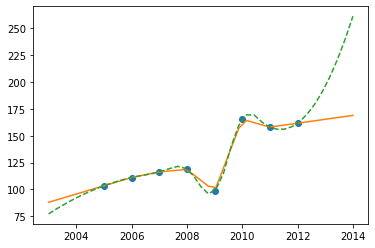

linear
95.69327916629868
165.29749779957248
168.9310951842072
Quadratic
92.09794780374128
196.06419303837134
261.23118090060404


In [147]:
# bihar plot
from scipy.interpolate import interp1d 
import numpy as np
x = [2005,2006,2007,2008,2009,2010,2011,2012]
y = [103.38805970149254,111.0828402366864,116.36216216216216,118.65441176470588,98.4776119402985,165.28057553956833,158.03030303030303,161.66390041493776]

# xx = [1,2,3,4,5,6,7,8,9,10,11,12] 
xnew = np.linspace(2003, 2014, num=41, endpoint=True)
f = interp1d(x, y, kind='linear',fill_value='extrapolate') 
f2 = interp1d(x, y, kind='quadratic',fill_value='extrapolate') 
import matplotlib.pyplot as plt
temp=f(2013)
# plt.plot(x,y,'o',ms=6)
# plt.plot(x,y)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.show()
print("linear")
print(f(2004))
print(f(2013))
print(f(2014))

print("Quadratic")
print(f2(2004))
print(f2(2013))
print(f2(2014))

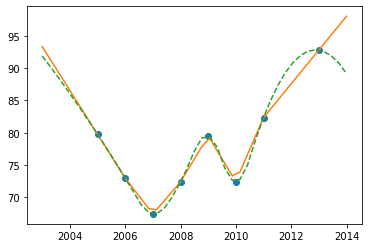

linear
87.5638891573251
98.00897516428296
Quadratic
90.51992988159662
89.1408529914684


In [148]:

# nagaland plot
from scipy.interpolate import interp1d 
import numpy as np
x = [2005,2006,2007,2008,2009,2010,2011,2013]
y = [79.76470588235294,72.98584905660377,67.4423076923077,72.38425925925925,79.4888888888889,72.44244604316546,82.34134615384616,92.78643216080403]

# xx = [1,2,3,4,5,6,7,8,9,10,11,12] 
xnew = np.linspace(2003, 2014, num=41, endpoint=True)
f = interp1d(x, y, kind='linear',fill_value='extrapolate') 
f2 = interp1d(x, y, kind='quadratic',fill_value='extrapolate') 
import matplotlib.pyplot as plt
temp=f(2013)
# plt.plot(x,y,'o',ms=6)
# plt.plot(x,y)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.show()
print("linear")

print(f(2012))
print(f(2014))

print("Quadratic")

print(f2(2012))
print(f2(2014))

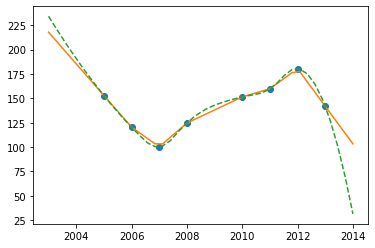

linear
180.41585526315788
103.27337550607291
Quadratic
180.4158552631579
31.462328901239857


In [149]:
# uttarakhand plot
from scipy.interpolate import interp1d 
import numpy as np
x = [2005,2006,2007,2008,2010,2011,2012,2013]
y = [	152.86206896551724,120.37931034482759,100.27380952380952,124.63888888888889,151.41368749575003,159.7810292855297,180.41585526315788,141.8446153846154]

# xx = [1,2,3,4,5,6,7,8,9,10,11,12] 
xnew = np.linspace(2003, 2014, num=41, endpoint=True)
f = interp1d(x, y, kind='linear',fill_value='extrapolate') 
f2 = interp1d(x, y, kind='quadratic',fill_value='extrapolate') 
import matplotlib.pyplot as plt
temp=f(2013)
# plt.plot(x,y,'o',ms=6)
# plt.plot(x,y)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.show()
print("linear")

print(f(2012))
print(f(2014))

print("Quadratic")

print(f2(2012))
print(f2(2014))